# Thompson Sampling Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# Implementing the Thompson Sampling Algorithm
from random import betavariate

N = 500 # total users
d = 10    # number of adds
add_selected = []

numbers_of_rewards1 = [1] * d
numbers_of_rewards0 = [0] * d
total_rewards       = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        # theta = bernoulli(numbers_of_rewards0[i] + 1, numbers_of_rewards1[i] + 1)
        random_beta = betavariate(numbers_of_rewards1[i] + 1, numbers_of_rewards0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    add_selected.append(ad)
    
    reward = dataset.values[n, ad]    
    if reward == 1:
        numbers_of_rewards1[ad] += 1
    else:
        numbers_of_rewards0[ad] += 1
    total_rewards += reward

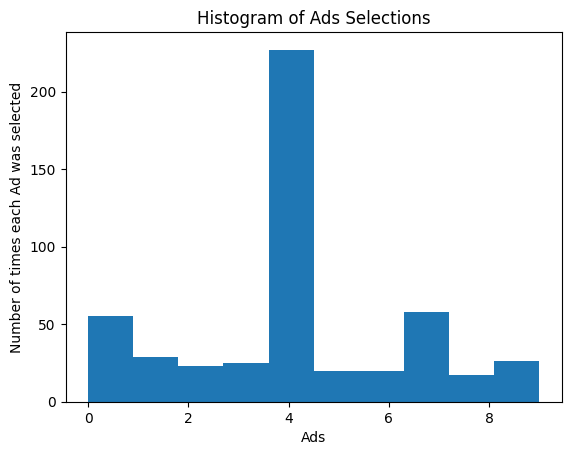

In [4]:
# Visualizing the results
plt.hist(add_selected)
plt.title("Histogram of Ads Selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each Ad was selected")
plt.show()